PREDICTOR DE EXPRESIONES FACIALES CON VGG 19

In [1]:
#Montamos drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

In [3]:
pathdata= '/content/Training/Training'

In [4]:
#importacion librerias

import os
import cv2
import numpy as np


In [5]:
import cv2
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from os import walk
from PIL import Image, ImageOps,ImageFilter
import pandas as pd
from os import remove
import tensorflow as tf


In [6]:
class endings( object ):
    def __init__( Self, String ):
        Self.String = String

    def __eq__( Self, Othr ):
        return Self.String.endswith( Othr )

def cambiarTamanoImagen(listaImagenPath,img_size):
    tamano=[]
    for listaImagen in listaImagenPath:
        for ficheroImg in listaImagen:
            #print(ficheroImg)
            img = cv2.imread(ficheroImg)
            #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img_resize= cv2.resize(img,(img_size,img_size))
            tamano.append(img_resize)
    return tamano

In [7]:
#CONVERSION DE IMAGENES Score0-5 a img 200x200
imagenes = []
GradoGen  = []
angry  = []
for base, dirs, files in os.walk(pathdata+'/Angry'):
    filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
    if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,150)
angry=np.array(GradoGen)

print(angry.shape)


(3995, 150, 150, 3)


In [8]:
tamano_imagen= 64
pathdata= '/content/Training/Training'
extension = '.jpg'
cantidad =0
cantidad0 = 0
cantidad1 = 0
cantidad2 = 0
cantidad3 = 0
cantidad4 = 0
cantidad5 = 0

imagenes=[]
angry=[]
fear=[]
happy=[]
neutral=[]
sad=[]
surprise=[]

imagenes = []
GradoGen  = []
angry  = []
for base, dirs, files in os.walk(pathdata+'/Angry'):
    filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
    cantidad0=cantidad0+len(filter_data)
    if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
angry=np.array(GradoGen)
imagenes=[]
print(angry.shape)

for base, dirs, files in os.walk(pathdata+'/Fear'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad1=cantidad1+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]

fear=np.array(GradoGen)
print(' fear shape: ',fear.shape)

for base, dirs, files in os.walk(pathdata+'/Happy'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad2=cantidad2+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]

happy=np.array(GradoGen)
print(' happy shape: ',happy.shape)



for base, dirs, files in os.walk(pathdata+'/Neutral'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad3=cantidad3+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]
neutral=np.array(GradoGen)
print(' neutral shape: ',neutral.shape)

for base, dirs, files in os.walk(pathdata+'/Sad'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad4=cantidad4+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]
sad=np.array(GradoGen)
print(' sad shape: ',sad.shape)

for base, dirs, files in os.walk(pathdata+'/Suprise'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad5=cantidad5+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]
surprise=np.array(GradoGen)
print(' Suprise shape: ',surprise.shape)

print(cantidad0+cantidad1+cantidad2+cantidad3+cantidad4+cantidad5)

(3995, 64, 64, 3)
 fear shape:  (4097, 64, 64, 3)
 happy shape:  (7215, 64, 64, 3)
 neutral shape:  (4965, 64, 64, 3)
 sad shape:  (4830, 64, 64, 3)
 Suprise shape:  (3171, 64, 64, 3)
28273


In [9]:
#Concatenacion de DATASET numero total de elementos
ImagesData = []

imagenesconcatImagenes= np.concatenate([angry,fear,happy,neutral,sad,surprise])
print(len(imagenesconcatImagenes))
ImagesData= np.array(imagenesconcatImagenes)
print(ImagesData.shape)

28273
(28273, 64, 64, 3)


In [10]:
#CREAMOS LAS ETIQUETAS PARA CADA SUBDIRECTORIO
etiquetas_angry= np.repeat(0,cantidad0)
print(len(etiquetas_angry))

etiquetas_fear= np.repeat(1,cantidad1)
print(len(etiquetas_fear))

etiquetas_happy= np.repeat(2,cantidad2)
print(len(etiquetas_happy))


etiquetas_neutral= np.repeat(3,cantidad3)
print(len(etiquetas_neutral))

etiquetas_sad= np.repeat(4,cantidad4)
print(len(etiquetas_sad))

etiquetas_surprise= np.repeat(5,cantidad5)
print(len(etiquetas_surprise))

3995
4097
7215
4965
4830
3171


In [11]:
#CLASES

clases_nombre=['angry','fear','happy','neutral','sad','suprise']
#etiquetas

etiquetas= np.concatenate([etiquetas_angry,etiquetas_fear,etiquetas_happy,etiquetas_neutral,etiquetas_sad,etiquetas_surprise])
print(len(etiquetas))

28273


(64, 64, 3)


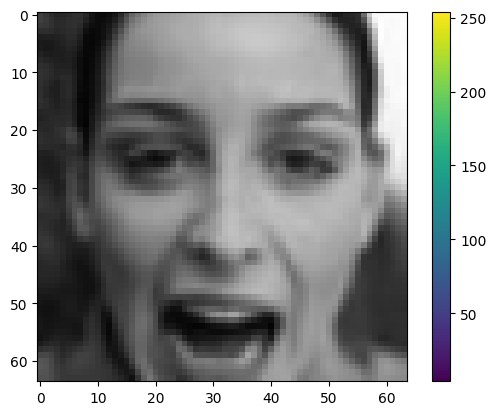

In [ ]:
import matplotlib.pyplot as plt

#PRUEBA DE IMAGENES
print(angry[4].shape)
plt.figure()
plt.imshow(np.squeeze(angry[4]))
plt.colorbar()
plt.grid(False)
plt.show()


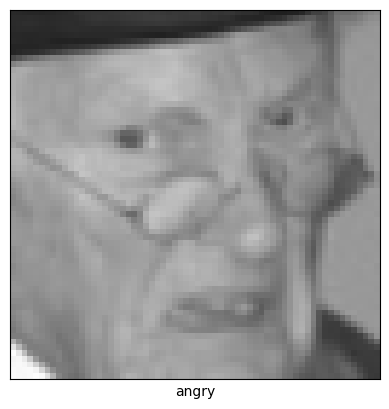

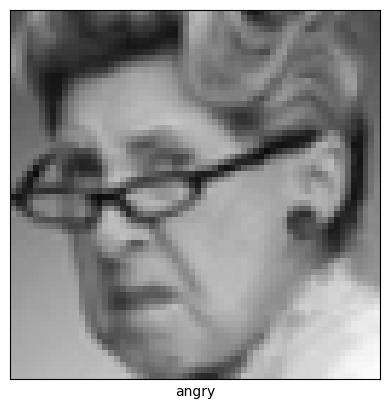

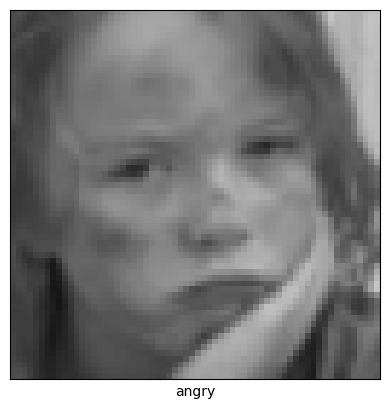

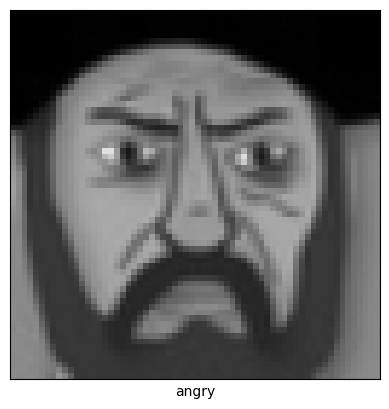

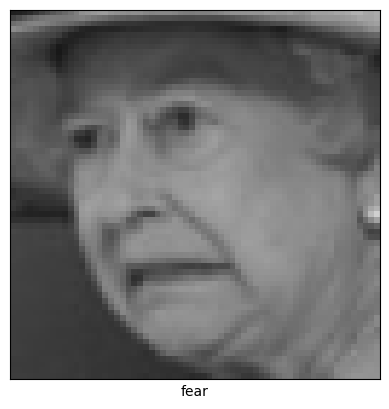

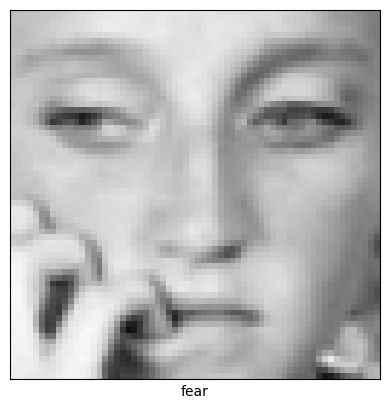

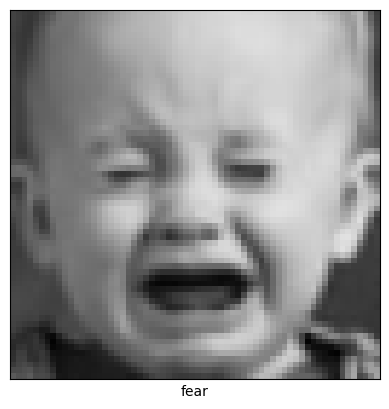

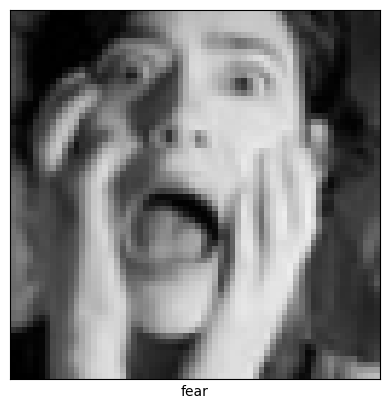

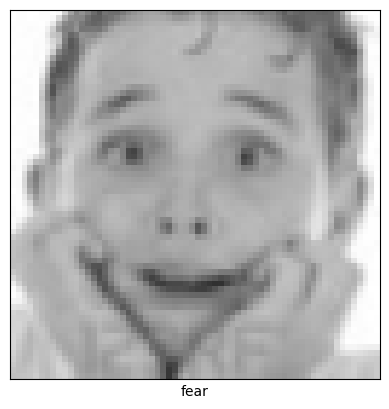

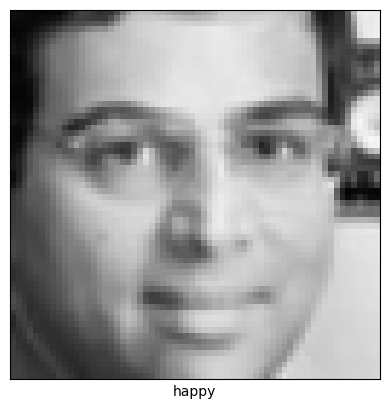

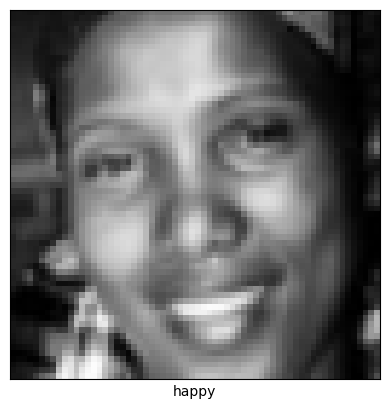

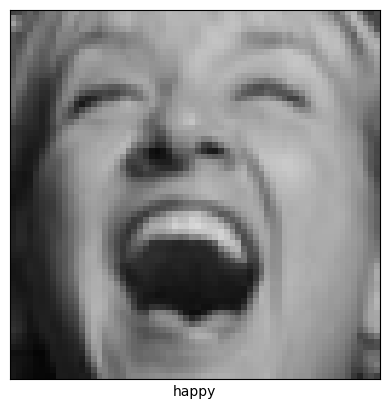

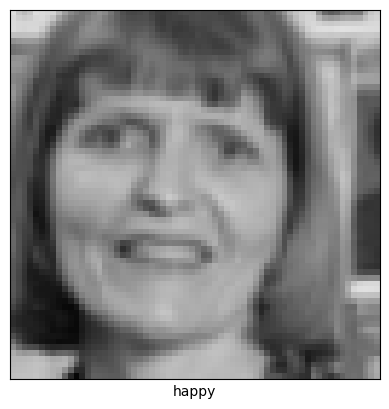

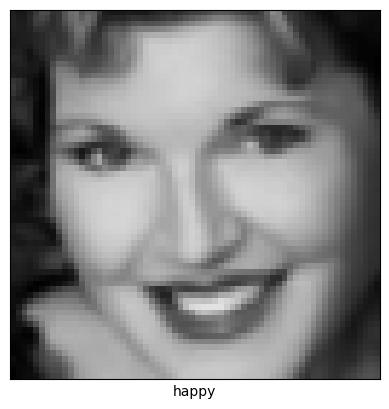

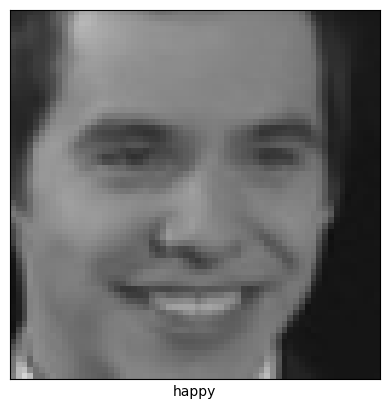

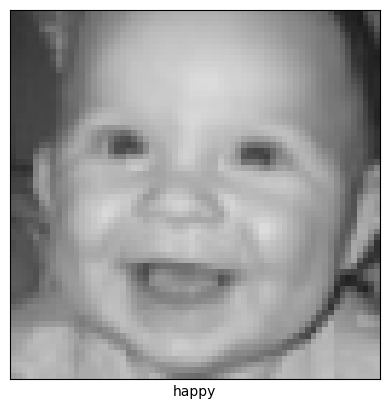

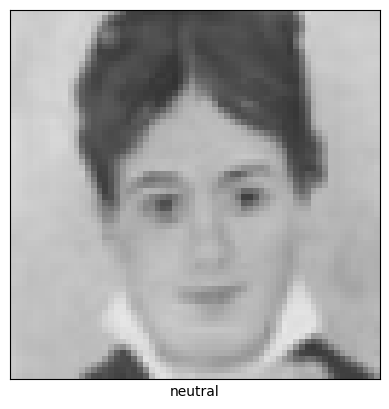

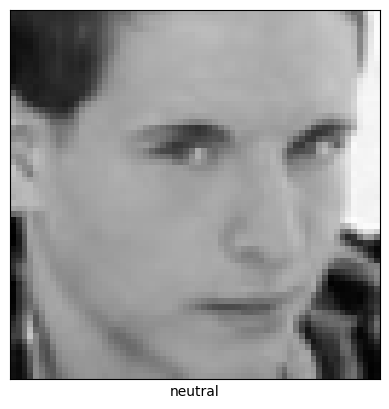

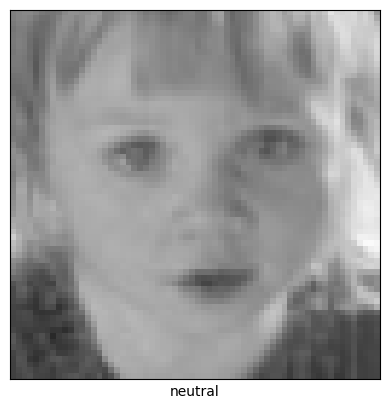

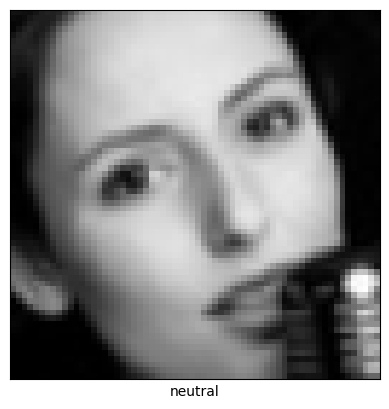

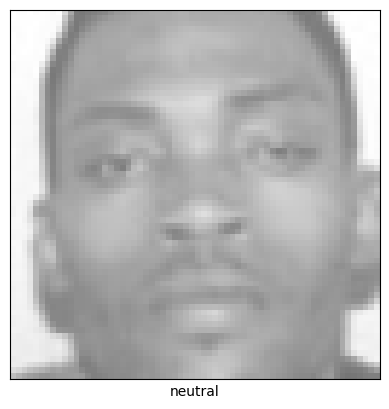

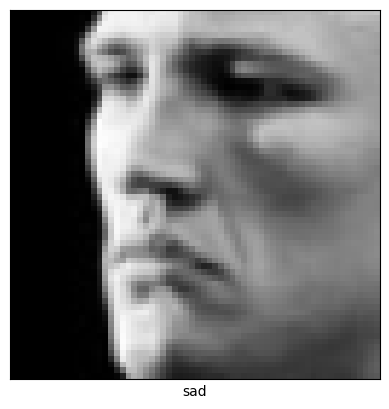

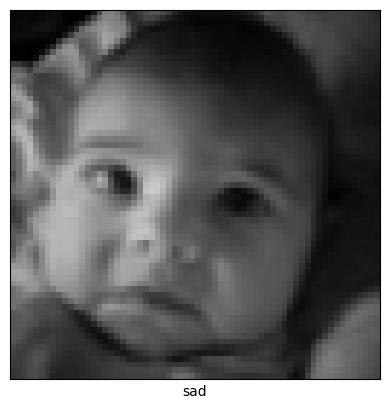

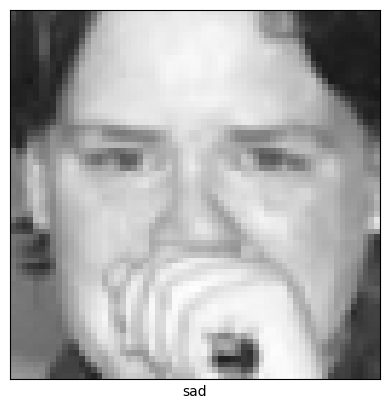

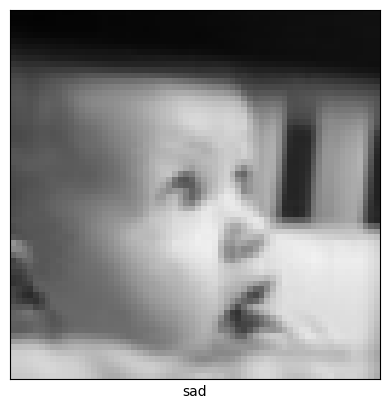

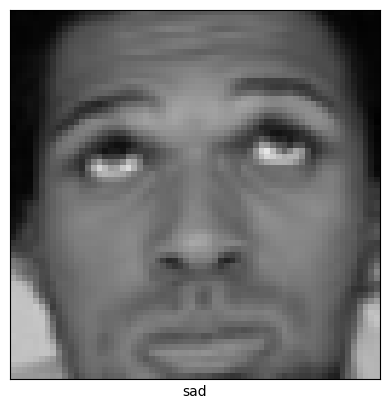

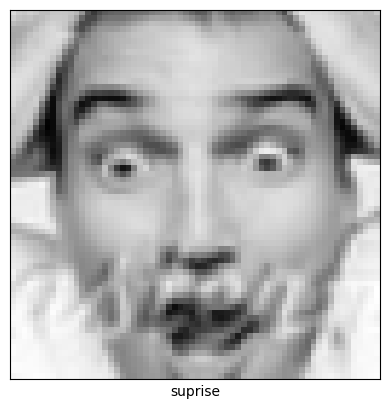

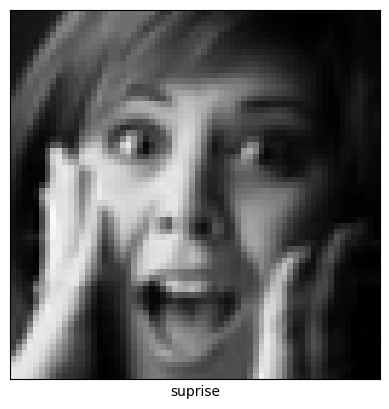

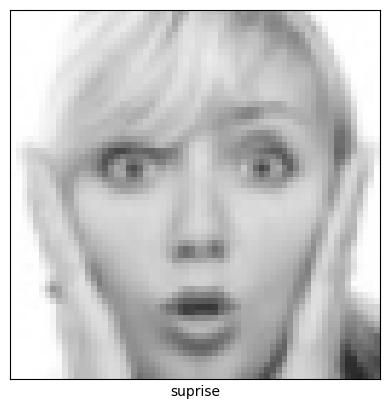

In [ ]:

for i in range(0,len(etiquetas),1000):
    plt.imshow(np.squeeze(ImagesData[i]))
    #plt.subplot(3,10,10)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(ImagesData[i])
    , cmap=plt.cm.binary
    plt.xlabel(clases_nombre[etiquetas[i]])
    plt.show()



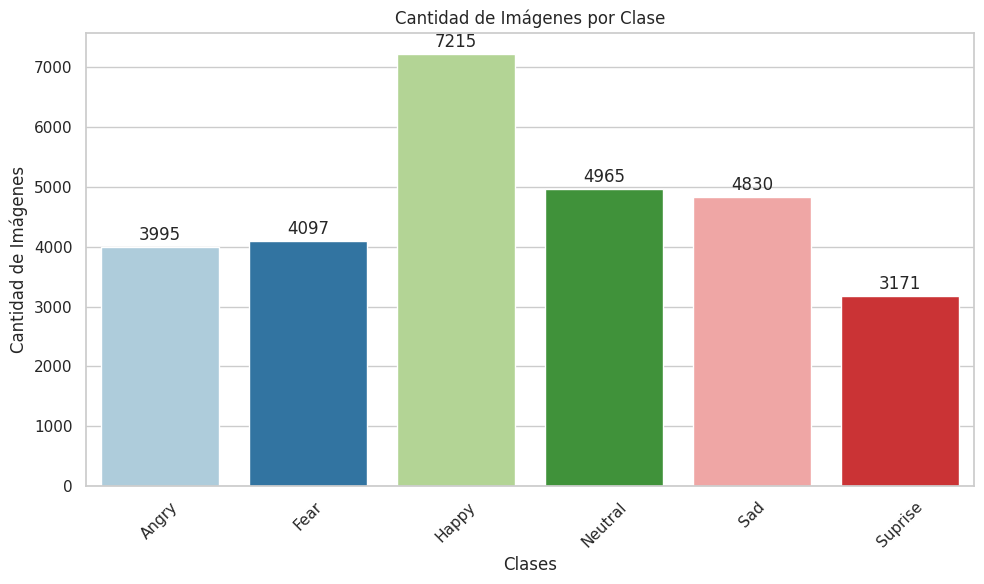

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo: reemplaza esto con tus datos reales
clases = ['Angry','Fear','Happy','Neutral','Sad','Suprise']
cantidad_imagenes = [len(angry),len(fear),len(happy),len(neutral),len(sad),len(surprise)]

# Configuración de estilo de Seaborn (opcional pero recomendado)
sns.set(style="whitegrid")

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Personaliza el gráfico
ax = sns.barplot(x=clases, y=cantidad_imagenes, palette="Paired")
plt.xlabel('Clases')
plt.ylabel('Cantidad de Imágenes')
plt.title('Cantidad de Imágenes por Clase')

# Añadir etiquetas en las barras
for i, cantidad in enumerate(cantidad_imagenes):
    ax.text(i, cantidad + 50, str(cantidad), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rota las etiquetas en el eje x para mayor legibilidad
plt.tight_layout()


In [13]:
y = np.array(etiquetas)
X = np.array(ImagesData, dtype=np.uint8)
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print('Etiquetas: ',y.shape)
print('Dataset : ',X.shape)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]
Etiquetas:  (28273,)
Dataset :  (28273, 64, 64, 3)


In [14]:
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.30)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

#Cambiar las etiquetas a one hot encoding
train_Y_one_hot = tf.keras.utils.to_categorical(train_Y,6)
test_Y_one_hot = tf.keras.utils.to_categorical(test_Y,6)




# Resultados de los cambios a one hot encoding
print('Original label:', train_Y[5])
print('After conversion to one-hot:', train_Y_one_hot[5])

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.40, random_state=12)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (19791, 64, 64, 3) (19791,)
Testing data shape :  (8482, 64, 64, 3) (8482,)
Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0. 0.]
(11874, 64, 64, 3) (7917, 64, 64, 3) (11874, 6) (7917, 6)


In [15]:

import tensorflow as tf
import keras
# Ahora puedes usar keras para importar funciones y clases de Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [49]:
from keras.applications import VGG19
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense

# Cargar el modelo VGG19 pre-entrenado (sin la capa de salida)
model = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Agregar capas adicionales
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(6, activation='softmax', name='Output')(x)

# Crear el modelo completo
model = Model(inputs=model.input, outputs=x)

# Congelar algunas capas y descongelar otras
for layer in model.layers[13:]:
    layer.trainable = False

# Descongelar las últimas capas para fine-tuning
for layer in model.layers[-6:]:
    layer.trainable = True


# Resumen del modelo
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [50]:
#Compilamos el modelo
from keras.optimizers import Adam
INIT_LR = 0.0001

opt = Adam(learning_rate=INIT_LR)

model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy',
                                                                                                                            tf.keras.metrics.Recall(),
                                                                                                                            tf.keras.metrics.Precision(),
                                                                                                                            tf.keras.metrics.FalsePositives(),
                                                                                                                            tf.keras.metrics.FalseNegatives(),
                                                                                                                            tf.keras.metrics.TruePositives(),
                                                                                                                            tf.keras.metrics.TrueNegatives(),])


In [33]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(11874, 64, 64, 3) (7917, 64, 64, 3) (11874, 6) (7917, 6)


In [126]:
#modelo sin Data Aug
#History = model.fit(train_X,train_label,
#                               epochs=20,
#                               verbose=1,
#                                validation_data =(valid_X, valid_label))

In [51]:
#si queremos dar mas imagenes al dataset para el entrenamiento
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=15, zoom_range=0.2,width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,horizontal_flip=True,fill_mode="nearest")
# train the network

History = model.fit(aug.flow(train_X,train_label),
                                epochs=20,
                                verbose=1,
                                validation_data =(valid_X, valid_label))

Epoch 1/20
372/372 [==============================] - 70s 83ms/step - loss: 1.7337 - accuracy: 0.2570 - recall_9: 0.0184 - precision_9: 0.6229 - false_positives_9: 132.0000 - false_negatives_9: 11656.0000 - true_positives_9: 218.0000 - true_negatives_9: 59238.0000 - val_loss: 1.6465 - val_accuracy: 0.3499 - val_recall_9: 0.2598 - val_precision_9: 0.5218 - val_false_positives_9: 1885.0000 - val_false_negatives_9: 5860.0000 - val_true_positives_9: 2057.0000 - val_true_negatives_9: 37700.0000
Epoch 2/20
372/372 [==============================] - 31s 82ms/step - loss: 1.4179 - accuracy: 0.4355 - recall_9: 0.1920 - precision_9: 0.7236 - false_positives_9: 871.0000 - false_negatives_9: 9594.0000 - true_positives_9: 2280.0000 - true_negatives_9: 58499.0000 - val_loss: 1.2479 - val_accuracy: 0.5069 - val_recall_9: 0.2387 - val_precision_9: 0.7898 - val_false_positives_9: 503.0000 - val_false_negatives_9: 6027.0000 - val_true_positives_9: 1890.0000 - val_true_negatives_9: 39082.0000
Epoch 3/20


In [62]:
#guardamos el modelo
model.save("/content/drive/My Drive/ModeloReconocimientoFacial.h5py")

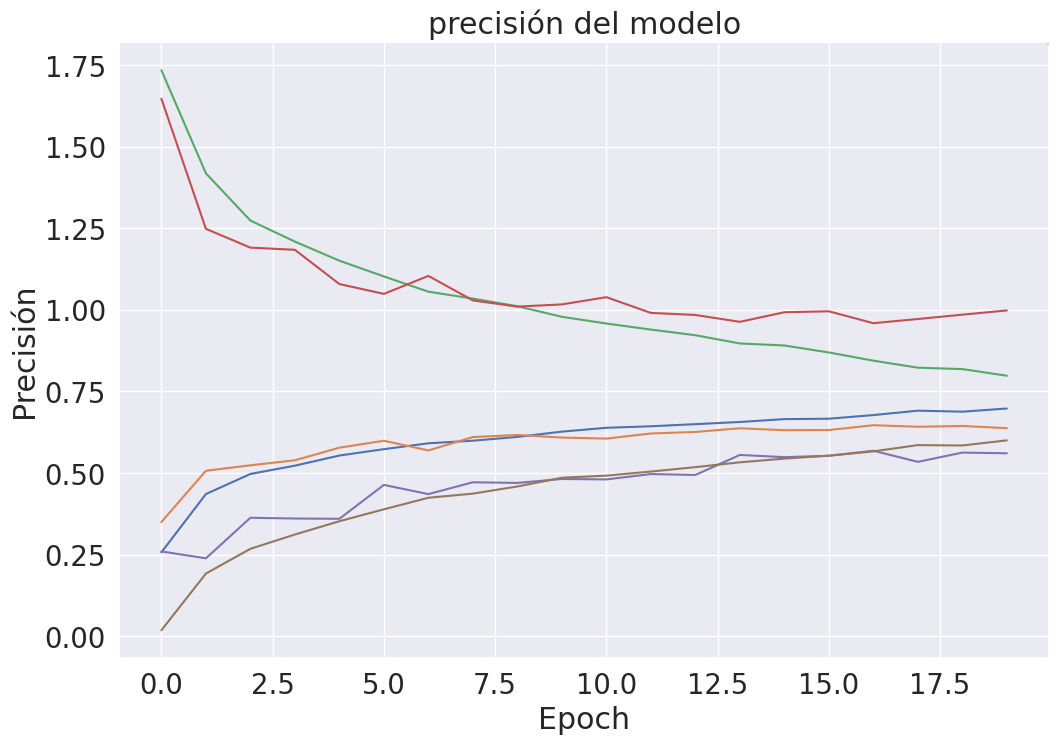

In [151]:
#Imprimimos las metricas para observar mejor el comprotamiento de nuestro modelo
plt.figure (figsize = (12,8))
plt.plot (History.history ["accuracy"])
plt.plot (History.history ['val_accuracy'])
plt.plot (History.history ['loss'])
plt.plot (History.history ['val_loss'])
plt.plot (History.history ['val_recall_9'])
plt.plot (History.history ['recall_9'])
#plt.plot (History.history ['mse'])

plt.title ("precisión del modelo")
plt.ylabel ("Precisión")
plt.xlabel ("Epoch")
plt.legend (["Precisión", "Precisión de validación", "pérdida" , "Pérdida de validación","val_recall","recall"])
plt.legend(fontsize=1)

plt.show()

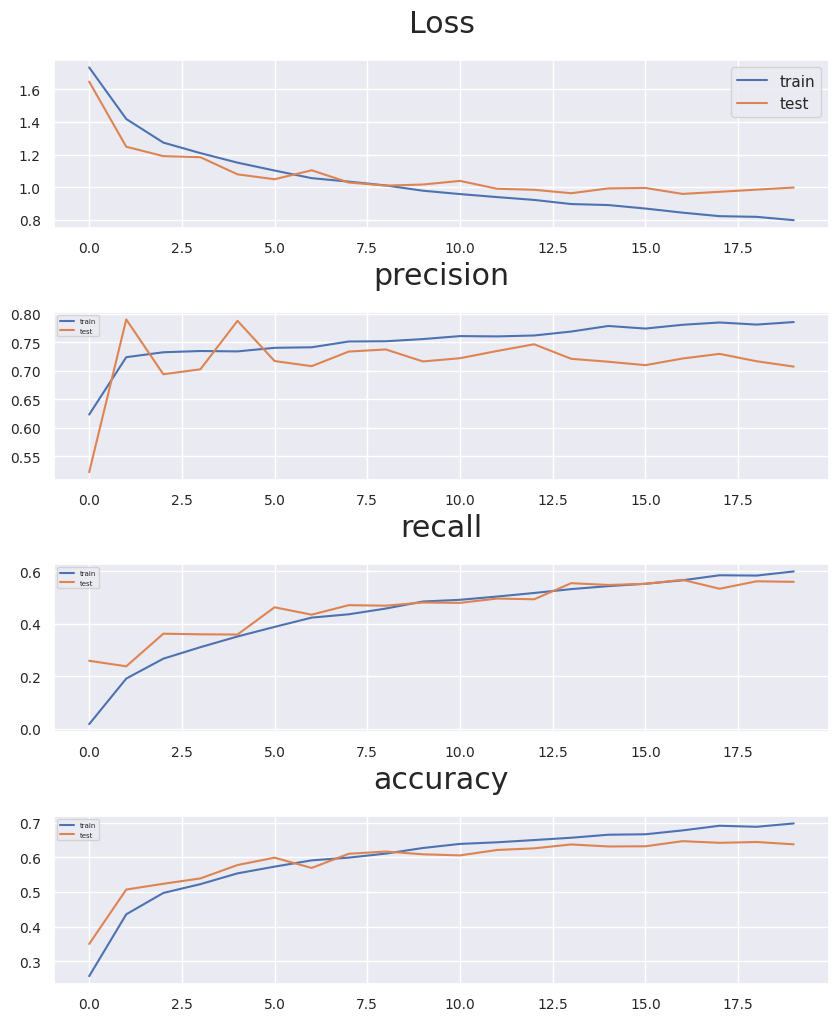

In [143]:

# plot evolución según epocas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols=1, figsize=(10,12))
#ax1.subplot(211)
plt.subplots_adjust(hspace=0.5)
ax1.set_title('Loss',pad=20)
ax1.plot(History.history['loss'], label='train')
ax1.plot(History.history['val_loss'], label='test')
ax1.legend(fontsize= 11)
# plot accuracy during training
#ax2.subplot(212)
ax2.set_title('precision', pad=20)
ax2.plot(History.history['precision_9'], label='train')
ax2.plot(History.history['val_precision_9'], label='test')
ax2.legend(fontsize= 5)

ax3.set_title('recall',pad=20)
ax3.plot(History.history['recall_9'], label='train')
ax3.plot(History.history['val_recall_9'], label='test')
ax3.legend(fontsize= 5)

ax4.set_title('accuracy',pad=20)
ax4.plot(History.history['accuracy'], label='train')
ax4.plot(History.history['val_accuracy'], label='test')
ax4.legend(fontsize= 5)


font_size = 10  # Ajusta el tamaño de fuente según tus necesidades

for ax in (ax1, ax2, ax3, ax4):
    ax.tick_params(axis='both', labelsize=font_size)

In [75]:
#Preparamos el modelo para predecir en el dataset de testing.
tamano_imagen= 64
pathdata= '/content/Testing/Testing'
extension = '.jpg'
cantidad =0
cantidad0 = 0
cantidad1 = 0
cantidad2 = 0
cantidad3 = 0
cantidad4 = 0
cantidad5 = 0

imagenes=[]
angry=[]
fear=[]
happy=[]
neutral=[]
sad=[]
surprise=[]

imagenes = []
GradoGen  = []
angry  = []
for base, dirs, files in os.walk(pathdata+'/Angry'):
    filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
    cantidad0=cantidad0+len(filter_data)
    if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
angry=np.array(GradoGen)
imagenes=[]
print(angry.shape)

for base, dirs, files in os.walk(pathdata+'/Fear'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad1=cantidad1+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]

fear=np.array(GradoGen)
print(' fear shape: ',fear.shape)

for base, dirs, files in os.walk(pathdata+'/Happy'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad2=cantidad2+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]

happy=np.array(GradoGen)
print(' happy shape: ',happy.shape)



for base, dirs, files in os.walk(pathdata+'/Neutral'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad3=cantidad3+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]
neutral=np.array(GradoGen)
print(' neutral shape: ',neutral.shape)

for base, dirs, files in os.walk(pathdata+'/Sad'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad4=cantidad4+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]
sad=np.array(GradoGen)
print(' sad shape: ',sad.shape)

for base, dirs, files in os.walk(pathdata+'/Suprise'):
       filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
       cantidad5=cantidad5+len(filter_data)
       if(len(filter_data)>0):
        imagenes.append(filter_data)
#print(imagenes)
GradoGen = cambiarTamanoImagen(imagenes,tamano_imagen)
imagenes=[]
surprise=np.array(GradoGen)
print(' Suprise shape: ',surprise.shape)

print(cantidad0+cantidad1+cantidad2+cantidad3+cantidad4+cantidad5)

(958, 64, 64, 3)
 fear shape:  (1024, 64, 64, 3)
 happy shape:  (1774, 64, 64, 3)
 neutral shape:  (1233, 64, 64, 3)
 sad shape:  (1247, 64, 64, 3)
 Suprise shape:  (831, 64, 64, 3)
7067


In [76]:
#Concatenacion de DATASET numero total de elementos
ImagesData = []

imagenesconcatImagenes= np.concatenate([angry,fear,happy,neutral,sad,surprise])
print(len(imagenesconcatImagenes))
ImagesData= np.array(imagenesconcatImagenes)
print(ImagesData.shape)

7067
(7067, 64, 64, 3)


In [77]:
#CREAMOS LAS ETIQUETAS PARA CADA SUBDIRECTORIO
etiquetas_angry= np.repeat(0,cantidad0)
print(len(etiquetas_angry))

etiquetas_fear= np.repeat(1,cantidad1)
print(len(etiquetas_fear))

etiquetas_happy= np.repeat(2,cantidad2)
print(len(etiquetas_happy))


etiquetas_neutral= np.repeat(3,cantidad3)
print(len(etiquetas_neutral))

etiquetas_sad= np.repeat(4,cantidad4)
print(len(etiquetas_sad))

etiquetas_surprise= np.repeat(5,cantidad5)
print(len(etiquetas_surprise))

958
1024
1774
1233
1247
831


In [78]:
#CLASES

clases_nombre=['angry','fear','happy','neutral','sad','suprise']
#etiquetas

etiquetas= np.concatenate([etiquetas_angry,etiquetas_fear,etiquetas_happy,etiquetas_neutral,etiquetas_sad,etiquetas_surprise])
print(len(etiquetas))

7067


In [79]:
y = np.array(etiquetas)
X = np.array(ImagesData, dtype=np.uint8)
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print('Etiquetas: ',y.shape)
print('Dataset : ',X.shape)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]
Etiquetas:  (7067,)
Dataset :  (7067, 64, 64, 3)


In [80]:
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.30)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = tf.keras.utils.to_categorical(train_Y,6)
test_Y_one_hot = tf.keras.utils.to_categorical(test_Y,6)




# Display the change for category label using one-hot encoding
print('Original label:', train_Y[5])
print('After conversion to one-hot:', train_Y_one_hot[5])

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.40, random_state=12)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (4946, 64, 64, 3) (4946,)
Testing data shape :  (2121, 64, 64, 3) (2121,)
Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0.]
(2967, 64, 64, 3) (1979, 64, 64, 3) (2967, 6) (1979, 6)


In [81]:
print(test_X.shape, test_Y_one_hot.shape)
evaluation = model.evaluate(test_X, test_Y_one_hot, verbose=1,return_dict=True)


(2121, 64, 64, 3) (2121, 6)
67/67 [==============================] - 2s 27ms/step - loss: 1.0210 - accuracy: 0.6271 - recall_9: 0.5592 - precision_9: 0.6981 - false_positives_9: 513.0000 - false_negatives_9: 935.0000 - true_positives_9: 1186.0000 - true_negatives_9: 10092.0000


(2121, 64, 64, 3) (2121, 6)
67/67 [==============================] - 1s 15ms/step
[[147  23  13  43  30  12]
 [ 38 110  18  58  61  45]
 [  3   6 448  54   8  26]
 [ 22  11  13 281  33   9]
 [ 39  32  18 130 141   4]
 [  1  19  10   7   5 203]]


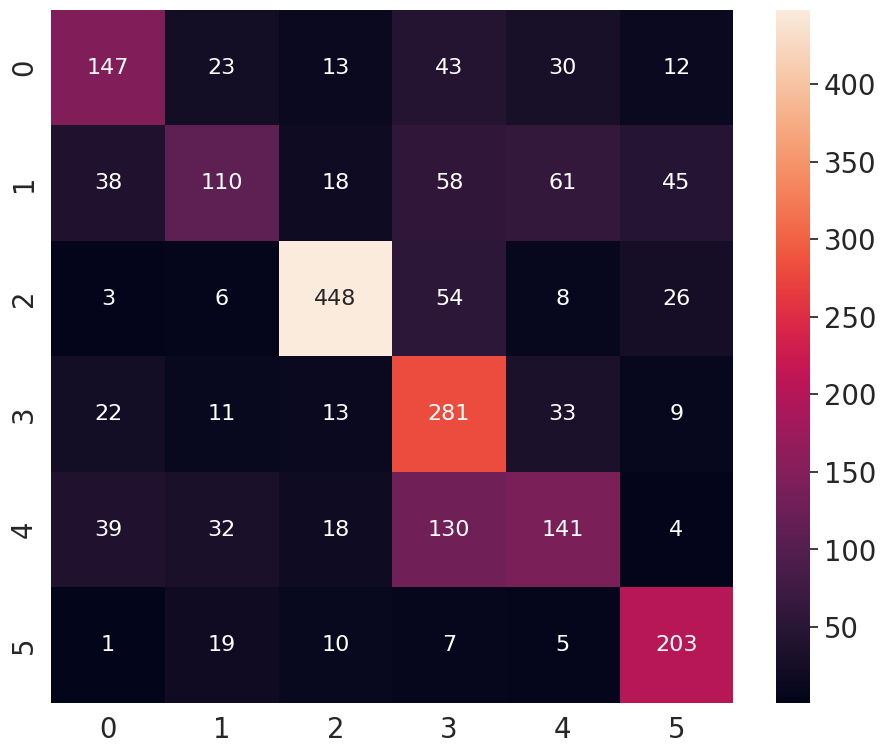

In [82]:
#Matriz de confusion para obtener las predicciones en todo el dataset de Test
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

print(test_X.shape, test_Y_one_hot.shape)
evaluation = model.evaluate(test_X, test_Y_one_hot, verbose=1,return_dict=True)

snn_pred = model.predict(test_X, batch_size=32, verbose=1)
snn_predicted = np.argmax(snn_pred, axis=1)

#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(test_Y_one_hot, axis=1), snn_predicted)
print(snn_cm)
# Visualiamos la matriz de confusión

#snn_df_cm = pd.DataFrame(snn_cm, range(6), range(6))
plt.figure(figsize = (11,9))
sn.set(font_scale=1.8) #for label size
sn.heatmap(snn_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [103]:

from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(64,64))
    img_tensor = image.img_to_array(img)
    img_tensor = img_tensor.astype("float")                  # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor

In [68]:
from keras.models import load_model
model2 = load_model('/content/drive/MyDrive/ModeloReconocimientoFacial.h5py')

1/1 [==============================] - 0s 31ms/step


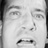

angry:    2.5579221546649933
Fear:   76.61218643188477
Happy   0.14638322172686458
Neutral :   0.15807910822331905
Sad:    2.76582483202219
Suprise:   17.759603261947632


In [112]:
from PIL import Image, ImageOps,ImageFilter
from IPython.display import Image, display
#Iiciamos las predicciones de imagen
path_i='/content/Testing/Testing/Fear/Fear-102.jpg'
new_image = load_image(path_i)

pred = model.predict(new_image)
display(Image(path_i,width=200,height=200))
print('angry:   ',pred[0][0]*100)
print('Fear:  ',pred[0][1]*100)
print('Happy  ',pred[0][2]*100)
print('Neutral :  ',pred[0][3]*100)
print('Sad:   ',pred[0][4]*100)
print('Suprise:  ',pred[0][5]*100)

1/1 [==============================] - 0s 44ms/step


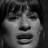

angry:    6.331171095371246
Fear:   8.886919170618057
Happy   2.5537917390465736
Neutral :   11.653830111026764
Sad:    64.03591632843018
Suprise:   6.538368761539459


In [127]:
from PIL import Image, ImageOps,ImageFilter
from IPython.display import Image, display
#Iiciamos las predicciones de imagen
path_i='/content/Testing/Testing/Sad/Sad-102.jpg'
new_image = load_image(path_i)

pred = model.predict(new_image)
display(Image(path_i,width=200,height=200))
print('angry:   ',pred[0][0]*100)
print('Fear:  ',pred[0][1]*100)
print('Happy  ',pred[0][2]*100)
print('Neutral :  ',pred[0][3]*100)
print('Sad:   ',pred[0][4]*100)
print('Suprise:  ',pred[0][5]*100)

1/1 [==============================] - 0s 30ms/step


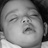

angry:    6.870508193969727
Fear:   16.693224012851715
Happy   6.576025485992432
Neutral :   43.084707856178284
Sad:    22.18068540096283
Suprise:   4.594852402806282


In [128]:
from PIL import Image, ImageOps,ImageFilter
from IPython.display import Image, display
#Iiciamos las predicciones de imagen
path_i='/content/Testing/Testing/Neutral/Neutral-102.jpg'
new_image = load_image(path_i)

pred = model.predict(new_image)
display(Image(path_i,width=200,height=200))
print('angry:   ',pred[0][0]*100)
print('Fear:  ',pred[0][1]*100)
print('Happy  ',pred[0][2]*100)
print('Neutral :  ',pred[0][3]*100)
print('Sad:   ',pred[0][4]*100)
print('Suprise:  ',pred[0][5]*100)

In [117]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

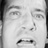

In [118]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#Ajustamos nuestra imagen a las ultimas capas delmodelo
img_size = (64, 64)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
"""
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]"""


last_conv_layer_name = "block5_conv4"
classifier_layer_names = [
    "global_average_pooling2d_7",
    "Output"
]
#dropout_1


# Imagen
img_path = "/content/Testing/Testing/Fear/Fear-102.jpg"
#

display(Image(img_path))

In [119]:
#Creaciom de heatmap
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer

    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)
    print(last_conv_layer)
    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

1/1 [==============================] - 0s 20ms/step
[0.02557922 0.76612186 0.00146383 0.00158079 0.02765825 0.17759603]
[[0.4451237  0.7199912  0.8863382  0.8259421 ]
 [0.3099741  0.44837472 0.53079695 0.5493811 ]
 [0.38127872 0.588358   0.72700584 0.7668296 ]
 [0.4558372  0.7730761  1.         0.9940141 ]]


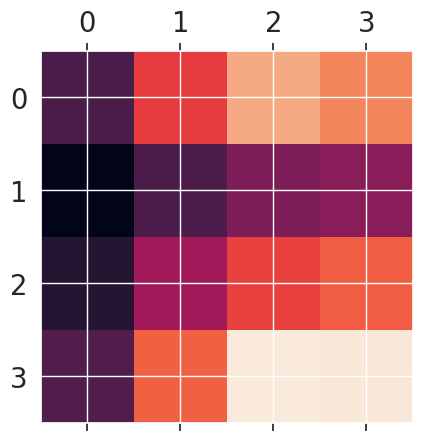

In [120]:
# Prepare image
img = keras.preprocessing.image.load_img(img_path, target_size=(150,150))

img_array = load_image(img_path)
# creacion del modelo
model = model


#Imprimir array de prediccion
preds = model.predict(img_array)
score = preds[0]
print(score)
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)
print(heatmap)

# Display heatmap
plt.matshow(heatmap)
plt.show()

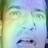

In [146]:
#Mostrando las capas de activacion de la red neuronal.

# Cargamos la Imagen original
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

#Reescalamos la imagen
heatmap = np.uint8(255 * heatmap)

# Colorear mapa
jet = plt.colormaps["jet"]

# RGB
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

#imagen con RGB
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superponer el RBG a la imagen
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Guardar imagen
save_path = "heatMapImage.jpg"
superimposed_img.save(save_path)

# Mostrar imagen
#display(Image(save_path))

display(Image(filename=save_path, width=400, height=400))